In [1]:
import pickle
import colorsys

import cv2 as cv
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from matplotlib import pyplot as plt
from learning.img_tuiles import TUILES as IMG_TILES
from functions.custom_functions import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Resizing, Rescaling, RandomFlip, RandomRotation, BatchNormalization, RandomContrast, RandomBrightness
from tensorflow.keras.utils import to_categorical

from os import listdir

2024-01-22 17:56:22.993795: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 17:56:22.995958: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-22 17:56:23.023681: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 17:56:23.023706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 17:56:23.024525: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

['mysteres01.png', 'mysteres02.png', 'mysteres03.png', 'mysteres04.png', 'mysteres05.png', 'mysteres06.png', 'mysteres07.png', 'mysteres08.png', 'mysteres09.png', 'mysteres10.png', 'mysteres11.png', 'mysteres12.png', 'mysteres13.png', 'mysteres14.png', 'mysteres15.png', 'mysteres16.png']


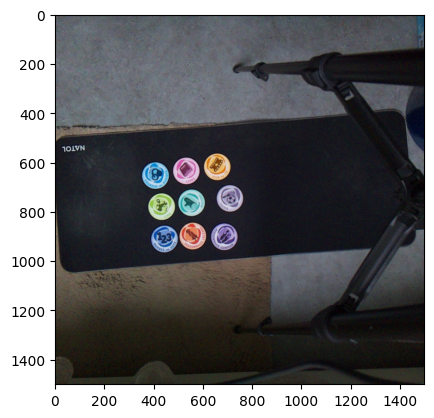

In [2]:
# Retrieve every jpg images in the ./images repository
files = listdir("../images")
images = sorted([file for file in files if file.endswith(".png")])
print(images)

cv_images = [cv.imread("../images/" + image) for image in images]
cv_images_rgb = [cv.cvtColor(image, cv.COLOR_BGR2RGB) for image in cv_images]

# Iterate through the image to display them on a row
plt.imshow(cv_images_rgb[0])

In [3]:
cv_images_tiles = [get_tiles(image) for image in cv_images_rgb]
cv_images_tiles[0]

In [4]:
for i, tiles in enumerate(cv_images_tiles):
    img_id = "M" + str(i + 1)
    tile_ids = IMG_TILES[img_id]
    
    for (id, tile) in zip(tile_ids, tiles):
        tile.set_tile_type(id)
        tile.set_img_id(img_id)
        print(tile)

Tile: {(408, 654, 54), (0.3968399830173539, 0.641698131412215, 0.7950436861458635), 0, 0, M1}
Tile: {(532, 636, 55), (0.7522282016109176, 0.5596620921239658, 0.7035952884899871), 1, 1, M1}
Tile: {(658, 620, 54), (0.811258697027198, 0.6368288682340076, 0.4365028173431535), 2, 2, M1}
Tile: {(432, 780, 55), (0.659939130236879, 0.7636399373509033, 0.553038005325587), 3, 3, M1}
Tile: {(554, 764, 54), (0.49104355605903593, 0.7259893437965672, 0.7384706096763473), 4, 4, M1}
Tile: {(708, 746, 54), (0.6104375046902304, 0.5832142282828933, 0.7014431972898508), 5, 5, M1}
Tile: {(444, 912, 55), (0.3799679537660625, 0.5030523848243529, 0.6969749258783391), 6, 6, M1}
Tile: {(558, 900, 55), (0.7945059969751328, 0.5345047969594083, 0.48171941563372206), 7, 7, M1}
Tile: {(686, 902, 55), (0.5320707008003708, 0.4879040483978756, 0.6688101430294603), 8, 8, M1}
Tile: {(408, 654, 55), (0.3854185863194002, 0.6386943001322086, 0.7851959439468518), 0, 0, M2}
Tile: {(532, 636, 54), (0.7693911812948252, 0.581626

In [5]:
# Flatten cv_images_tiles
cv_images_tiles_flatten = [tile for tiles in cv_images_tiles for tile in tiles]
cv_images_tiles_flatten

In [6]:
# Create a dataframe with the tiles data as columns [hue, saturation, value, position_x, position_y, radius, tile_id]
# As each tiles are objects, we need to extract the data from each object
data = [[tile.color[0], tile.color[1], tile.color[2], tile.dimensions[0], tile.dimensions[1], tile.dimensions[2], tile.tile_type, tile.img_id] for tile in cv_images_tiles_flatten]
data

[[0.3968399830173539,
  0.641698131412215,
  0.7950436861458635,
  408,
  654,
  54,
  0,
  'M1'],
 [0.7522282016109176,
  0.5596620921239658,
  0.7035952884899871,
  532,
  636,
  55,
  1,
  'M1'],
 [0.811258697027198,
  0.6368288682340076,
  0.4365028173431535,
  658,
  620,
  54,
  2,
  'M1'],
 [0.659939130236879,
  0.7636399373509033,
  0.553038005325587,
  432,
  780,
  55,
  3,
  'M1'],
 [0.49104355605903593,
  0.7259893437965672,
  0.7384706096763473,
  554,
  764,
  54,
  4,
  'M1'],
 [0.6104375046902304,
  0.5832142282828933,
  0.7014431972898508,
  708,
  746,
  54,
  5,
  'M1'],
 [0.3799679537660625,
  0.5030523848243529,
  0.6969749258783391,
  444,
  912,
  55,
  6,
  'M1'],
 [0.7945059969751328,
  0.5345047969594083,
  0.48171941563372206,
  558,
  900,
  55,
  7,
  'M1'],
 [0.5320707008003708,
  0.4879040483978756,
  0.6688101430294603,
  686,
  902,
  55,
  8,
  'M1'],
 [0.3854185863194002,
  0.6386943001322086,
  0.7851959439468518,
  408,
  654,
  55,
  0,
  'M2'],
 [

In [7]:
df = pd.DataFrame(data, columns=["red", "green", "blue", "position_x", "position_y", "radius", "tile_id", "img_id"])
df.head()

,red,green,blue,position_x,position_y,radius,tile_id,img_id
0,0.396840,0.641698,0.795044,408,654,54,0,M1
1,0.752228,0.559662,0.703595,532,636,55,1,M1
2,0.811259,0.636829,0.436503,658,620,54,2,M1
3,0.659939,0.763640,0.553038,432,780,55,3,M1
4,0.491044,0.725989,0.738471,554,764,54,4,M1


In [8]:
model = DecisionTreeClassifier()
X = df[["red", "green", "blue"]]
Y = pd.get_dummies(df[["tile_id"]], columns=["tile_id"])

In [9]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9655172413793104

In [11]:
Y_pred = model.predict(X_test)

In [12]:
pd.DataFrame.from_dict(classification_report(Y_test, Y_pred, output_dict=True))

/home/margaux/HEPL/y2/sys-vision/mysteres-vision/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/margaux/HEPL/y2/sys-vision/mysteres-vision/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,micro avg,macro avg,weighted avg,samples avg
precision,0.666667,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965517,0.833333,0.977011,0.965517
recall,1.000000,0.0,1.0,1.0,0.666667,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965517,0.833333,0.965517,0.965517
f1-score,0.800000,0.0,1.0,1.0,0.800000,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965517,0.828571,0.965517,0.965517
support,2.000000,0.0,2.0,3.0,3.000000,1.0,1.0,0.0,2.0,2.0,5.0,4.0,3.0,1.0,29.000000,29.000000,29.000000,29.000000


In [13]:
s = pickle.dumps(model)
with open("./model/mysteres01.pkl", "wb") as file:
    file.write(s)

In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", input_shape=(128, 128, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation="relu", kernel_initializer="random_normal"))
model.add(Dense(14, activation="softmax", kernel_initializer="random_normal"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                5

In [15]:
X = []
Y = []
for tile in cv_images_tiles_flatten:
    img = cv_images_rgb[int(tile.img_id[1])]
    # Get a square around the tile
    square = img[tile.position_y - tile.radius:tile.position_y + tile.radius, tile.position_x - tile.radius:tile.position_x + tile.radius]
    square = cv.resize(square, (128, 128))
    X.append(square)
    Y.append(tile.tile_type)
    
Y = to_categorical(np.array(Y), num_classes=14)
print(Y)
X = np.array(X)
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[[[ 34  32  43]
   [ 33  31  42]
   [ 31  30  39]
   ...
   [ 24  28  40]
   [ 24  26  39]
   [ 23  25  38]]

  [[ 31  30  41]
   [ 32  30  41]
   [ 31  30  39]
   ...
   [ 25  28  40]
   [ 25  27  40]
   [ 24  26  39]]

  [[ 32  29  39]
   [ 32  31  40]
   [ 32  31  40]
   ...
   [ 26  29  40]
   [ 26  28  41]
   [ 26  28  40]]

  ...

  [[ 38  40  42]
   [ 36  40  41]
   [ 35  38  41]
   ...
   [ 34  30  38]
   [ 33  28  38]
   [ 32  26  37]]

  [[ 34  39  42]
   [ 33  39  42]
   [ 33  37  41]
   ...
   [ 34  30  38]
   [ 33  28  38]
   [ 32  26  38]]

  [[ 29  37  40]
   [ 29  37  40]
   [ 29  37  40]
   ...
   [ 33  29  39]
   [ 34  28  40]
   [ 33  27  39]]]


 [[[ 28  28  38]
   [ 26  26  36]
   [ 26  26  36]
   ...
   [ 36  31  37]
   [ 36  31  37]
   [ 35  33  38]]

  [[ 29  27  38]
   [ 28  27  36]
   [ 27  27  36]
   ...


In [16]:
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2)
])

# Apply the data augmentation to the X data
X_augmented = data_augmentation(X)
X_augmented

<tf.Tensor: shape=(144, 128, 128, 3), dtype=float32, numpy=
array([[[[156.42352  , 203.30748  , 232.70535  ],
         [163.27307  , 204.04192  , 232.02098  ],
         [166.92856  , 202.84529  , 229.46921  ],
         ...,
         [141.16052  , 194.52374  , 224.37857  ],
         [120.59249  , 182.30319  , 217.00983  ],
         [ 94.31259  , 167.50146  , 207.09439  ]],

        [[166.63124  , 203.8725   , 229.37886  ],
         [169.76443  , 201.2095   , 226.60657  ],
         [173.863    , 202.42194  , 226.08218  ],
         ...,
         [151.02335  , 198.89238  , 227.17583  ],
         [137.7558   , 192.74402  , 223.42914  ],
         [114.641785 , 179.3613   , 214.689    ]],

        [[173.14738  , 203.11786  , 225.80704  ],
         [175.7656   , 202.41339  , 224.12515  ],
         [177.58658  , 201.97086  , 223.05515  ],
         ...,
         [157.29327  , 201.53662  , 229.07935  ],
         [147.86838  , 198.51906  , 227.62953  ],
         [132.57549  , 190.99327  , 222.9321

In [17]:
model.fit(X_augmented, Y, epochs=30, shuffle=True, validation_split=0.2)

Epoch 1/30
4/4 [==============================] - 1s 130ms/step - loss: 41.5192 - accuracy: 0.1130 - val_loss: 8.0300 - val_accuracy: 0.0690
Epoch 2/30
4/4 [==============================] - 0s 103ms/step - loss: 4.6294 - accuracy: 0.1130 - val_loss: 3.5313 - val_accuracy: 0.0000e+00
Epoch 3/30
4/4 [==============================] - 0s 110ms/step - loss: 3.0285 - accuracy: 0.0261 - val_loss: 3.0250 - val_accuracy: 0.0345
Epoch 4/30
4/4 [==============================] - 0s 100ms/step - loss: 2.5909 - accuracy: 0.1652 - val_loss: 2.9112 - val_accuracy: 0.0690
Epoch 5/30
4/4 [==============================] - 0s 99ms/step - loss: 2.4955 - accuracy: 0.1565 - val_loss: 2.9236 - val_accuracy: 0.0345
Epoch 6/30
4/4 [==============================] - 0s 115ms/step - loss: 2.4430 - accuracy: 0.1826 - val_loss: 2.9646 - val_accuracy: 0.0345
Epoch 7/30
4/4 [==============================] - 0s 96ms/step - loss: 2.3304 - accuracy: 0.2348 - val_loss: 3.2620 - val_accuracy: 0.0690
Epoch 8/30
4/4 [=

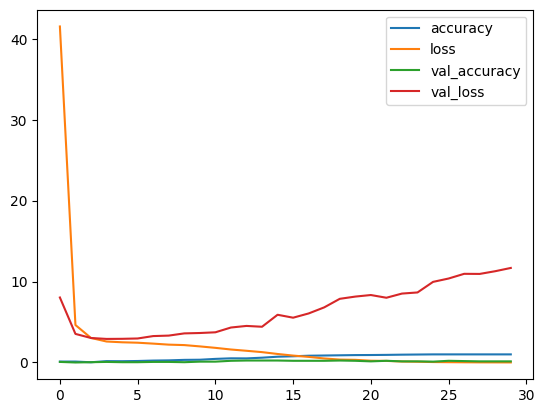

In [18]:
# Display metrics for the model as a graph
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_accuracy"])
plt.plot(model.history.history["val_loss"])
plt.legend(["accuracy", "loss", "val_accuracy", "val_loss"])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


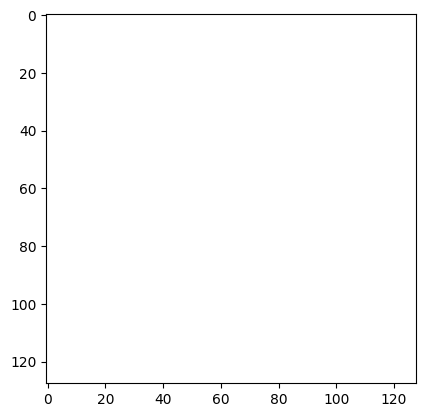

In [19]:
plt.imshow(X_augmented[0])